In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import pickle
import time
from natsort import natsorted, ns

In [2]:
# img_path = '/Users/Steven/Documents/projects/data/lego/01_raw/2x2_green/'
# img_fname = 'IMG_4694.jpeg'

In [3]:
def load_image2np(path):
    '''load jpeg image from path and output as numpy array'''
    img = Image.open(path) # open jpeg as PIL Image 
    img_np = np.array(img) # convert to numpy array shape: height x width x channel
    return img_np

In [4]:
def load_image(path):
    '''load jpeg image from path and output as numpy array'''
    img = Image.open(path) # open jpeg as PIL Image 
    return img

In [5]:
def plot_image(img_np, figsize=(6, 6)):
    '''plot image from numpy array'''
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_np)
    plt.show()

In [6]:
def resize_image(img, imgsize=(32,32)):
    '''take PIL image and resize'''
    imgResize = img.resize(imgsize, Image.ANTIALIAS)
    return imgResize

In [7]:
def resize_image_np(img_np, imgsize=(32,32)):
    '''take image as numpy array and resize in PIL before reconverting to numpy array'''
    img = Image.fromarray(img_np)
    imgResize = img.resize(imgsize, Image.ANTIALIAS)
    imgResize_np = np.array(imgResize)
    return imgResize_np

In [8]:
def dir_fname_list(dir_path, suffix='jpeg', sorting=False):
    """load all files from a directory with a given suffix 
    into a dictionary with keys: filenames and files"""
    
    # create list of filename prefixes in directory
    filenames = [f for f in os.listdir(dir_path) if f.split('.')[1] == suffix]
    
    # if sorting requested then sort filenames
    if sorting:        
        filenames = natsorted(filenames, alg=ns.IGNORECASE)
                    
    return filenames

In [12]:
base_path = '/Users/Steven/Documents/projects/data/lego/'
bricks = ['4x2_green', '2x2_green', '3x1_green']
# bricks = ['4x2_green']
combined_dict = {'fname':[], 'image':[], 'label':[], 'class':[]}

st = time.time()
for i, brick in enumerate(bricks):
    raw_path = base_path + '01_raw/' + brick + '/'
    print(raw_path)
    print(i)
    print(brick)
    
    fnames = dir_fname_list(raw_path, suffix='jpeg', sorting=True)
    img_list = [load_image(raw_path + f) for f in fnames]
    imgResize_list = [resize_image(img, imgsize=(32,32)) for img in img_list]

    list_len = len(fnames)
    label_list = [brick]*list_len 
    class_list = [i]*list_len
    
    combined_dict['fname'].extend(fnames)
    combined_dict['image'].extend(imgResize_list)
    combined_dict['label'].extend(label_list)
    combined_dict['class'].extend(class_list)
    
    print('Time taken: {:.2f} seconds'.format(time.time() - st))

/Users/Steven/Documents/projects/data/lego/01_raw/4x2_green/
0
4x2_green
Time taken: 94.77 seconds
/Users/Steven/Documents/projects/data/lego/01_raw/2x2_green/
1
2x2_green
Time taken: 187.43 seconds
/Users/Steven/Documents/projects/data/lego/01_raw/3x1_green/
2
3x1_green
Time taken: 260.23 seconds


IMG_4426.jpeg
3x1_green
2


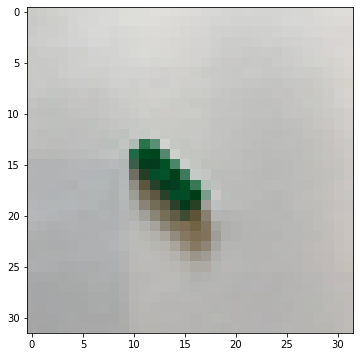

In [13]:
print(combined_dict['fname'][800])
print(combined_dict['label'][800])
print(combined_dict['class'][800])
plot_image(np.array(combined_dict['image'][800]), figsize=(6, 6))

In [14]:
save_dir = base_path + 'pickles/'
# make output directory if it does not exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
st = time.time()    
# Save resized img dictionary
with open(save_dir + 'resized_img_dict_v01.pickle', 'wb') as handle:
    pickle.dump(combined_dict, handle)  
print('Time taken: {:.2f} seconds'.format(time.time() - st))

Time taken: 1.34 seconds
